# 1. Generating and Working with Images | DALL-E API

In this notebook we will use OpenAI's DALL-E API to generate and work with images. DALL-E is a cutting-edge AI system that can create realistic images and art from a description in natural language

# 2. Libraries import

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [ ]:
import os
import openai

from openai import OpenAI

# 3. Sending a first request to OpenAI API


### 3.1 Setting up API Key

In [ ]:
os.environ["OPENAI_API_KEY"] = "sk-XXXXXXXXXXXXX"
client = OpenAI()

# 4. Generating images with DALLE

- n = The number of images to generate. Must be between 1 and 10.
- prompt = What image to generate
- size = size of the generated image in pixels

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Function to display image from a given URL
def show_image_from_url(url):
    response = requests.get(url)                # Send a GET request to the image URL
    img = Image.open(BytesIO(response.content)) # Open the image from the bytes in the response
    plt.imshow(img)                             # Use Matplotlib to display the image
    plt.axis('off')                             # Hide the axis to only show the image
    plt.show()



## Generating images

In [ ]:
# Saving image from the original prompt
import requests

def save_image_from_url(url, file_path):
    response = requests.get(url)
    if response.status_code == 200:  # Check if the request was successful
        with open(file_path, 'wb') as f:  # Open a file in binary write mode
            f.write(response.content)  # Write the content of the response to the file
        print(f"Image saved at {file_path}")
    else:
        print(f"Error: Unable to retrieve image. Status code: {response.status_code}")

In [ ]:
# response = client.images.generate(
#   model="dall-e-3",
#   prompt="a white siamese cat",
#   size="1024x1024",
#   quality="standard",
#   n=1,
# )

response = client.images.generate(
  prompt="a vaporwave pool with 80s symbols around it",
  size="1024x1024",
  n=1,
)

image_url = response.data[0].url

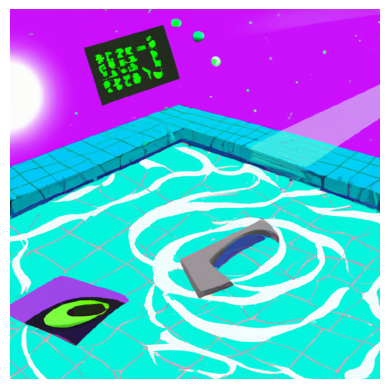

In [ ]:
show_image_from_url(image_url)

In [ ]:
save_image_from_url(image_url, "test_img.jpg")

Image saved at test_img.jpg


## Editing images

If this website is online, use this one to create masks: https://ai-image-editor.netlify.app/

If offline, you can create masks using photoshop

In [ ]:
from PIL import Image

# Load the mask image
mask = Image.open('mask.png')

# Resize it to the required dimensions
resized_mask = mask.resize((1024, 1024), Image.ANTIALIAS)

# Save the resized mask
resized_mask.save('resized_mask.png')
print('The mask has been resized and saved as "resized_mask.png"')

### ABOVE THIS LINE IS OPTIONAL CODE IN CASE YOUR MASK IS A DIFFERENT SIZE
res = client.images.edit(
  image=open("test_img.jpg", "rb"),
  mask=open("resized_mask.png", "rb"),
  prompt="Cute rubber duck",
  n=2,
  size="1024x1024"
)

<ipython-input-33-88743995efff>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_mask = mask.resize((1024, 1024), Image.ANTIALIAS)


The mask has been resized and saved as "resized_mask.png"


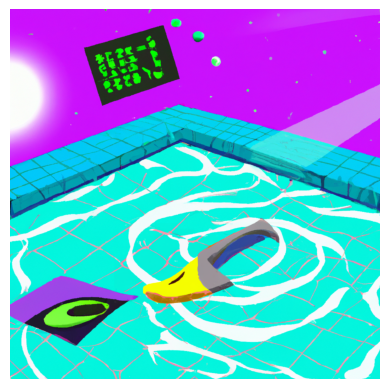

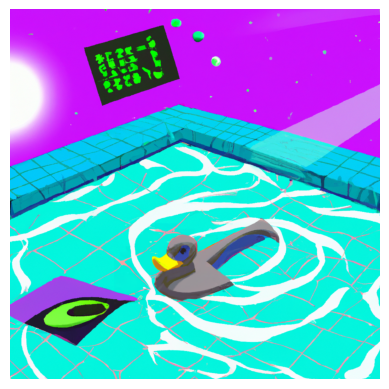

In [ ]:
for image in res.data:
    show_image_from_url(image.url)